# **Predicción de ventas de productos de Amazon utilizando datos reales de Helium 10**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Carga de datos**
---

In [2]:
df = pd.read_csv('./data/US_AMAZON_blackBoxProducts.csv')
df.head()

,URL,Image URL,ASIN,Title,Brand,Fulfillment,Category,BSR,UPC,GTIN,...,Width,Height,Weight,Storage Fee (Jan - Sep),Storage Fee (Oct - Dec),Best Sales Period,Age (Month),Number of Images,Variation Count,Sales to Reviews
0,https://amazon.com/dp/B076QJ34PS,https://m.media-amazon.com/images/I/41bkoe-QSK...,B076QJ34PS,Canon PG-240XXL Extra High Capacity Black Ink ...,Canon,FBA,Office Products,46391,7.036241e+11,NaN,...,3.35,4.41,0.33,16.36,45.14,02/28/2025,98,1,0,0.10
1,https://amazon.com/dp/B000AN1RS6,https://m.media-amazon.com/images/I/41JqI0Y-A+...,B000AN1RS6,"Pendaflex Reinforced Tab File Folders, Letter ...",Pendaflex,FBM,Office Products,33902,7.874640e+11,7.878782e+10,...,10.00,12.05,6.50,NaN,NaN,07/31/2025,205,6,2,0.44
2,https://amazon.com/dp/B0089QJQSE,https://m.media-amazon.com/images/I/711ATuGq-j...,B0089QJQSE,Teacher Created Resources 5&6 I Have Language ...,Teacher Created Resources,Amazon,Office Products,36391,8.823198e+10,8.823198e+10,...,4.21,5.63,0.66,NaN,NaN,07/31/2024,159,4,0,2.71
3,https://amazon.com/dp/B004DE1IB4,https://m.media-amazon.com/images/I/41rUEhqKa2...,B004DE1IB4,VHOB Page-Up Color Plus Document Holder - Oran...,Page-Up,FBA,Office Products,108731,6.659280e+11,NaN,...,1.89,2.20,0.15,3.14,8.66,07/31/2025,178,1,0,1.15
4,https://amazon.com/dp/B003U6MZVI,https://m.media-amazon.com/images/I/81Xzyq8tiW...,B003U6MZVI,"School Smart Hard Cover Composition Book, Unru...",School Smart,Amazon,Office Products,67375,8.856340e+11,8.856340e+11,...,7.56,9.65,0.70,NaN,NaN,07/31/2025,174,10,2,6.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        200 non-null    object 
 1   Image URL                  200 non-null    object 
 2   ASIN                       200 non-null    object 
 3   Title                      200 non-null    object 
 4   Brand                      200 non-null    object 
 5   Fulfillment                200 non-null    object 
 6   Category                   200 non-null    object 
 7   BSR                        200 non-null    int64  
 8   UPC                        168 non-null    float64
 9   GTIN                       127 non-null    float64
 10  EAN                        184 non-null    float64
 11  ISBN                       3 non-null      float64
 12  Subcategory                200 non-null    object 
 13  Subcategory BSR            200 non-null    int64  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BSR,200.0,4.726317e+04,4.242855e+04,2.580000e+02,1.560950e+04,3.836000e+04,6.725575e+04,3.577930e+05
UPC,168.0,4.717202e+11,3.642260e+11,1.197405e+10,7.283811e+10,6.354944e+11,7.990888e+11,9.999966e+11
GTIN,127.0,4.388806e+12,1.256772e+13,1.034388e+10,7.097244e+10,7.878782e+10,8.066303e+11,6.007278e+13
EAN,184.0,1.762266e+12,2.715264e+12,1.197405e+10,7.519569e+10,7.181031e+11,8.857538e+11,9.788863e+12
ISBN,3.0,3.266539e+12,5.648499e+12,1.891627e+09,5.377279e+09,8.862931e+09,4.898863e+12,9.788863e+12
Subcategory BSR,200.0,4.794250e+02,9.083957e+02,1.000000e+00,5.125000e+01,1.615000e+02,5.225000e+02,7.440000e+03
Price,200.0,2.673225e+01,5.423291e+01,3.990000e+00,9.290000e+00,1.496500e+01,2.499000e+01,5.840000e+02
Price Trend (90 days) (%),195.0,1.383590e+01,1.913809e+02,-7.100000e+01,-1.000000e+01,-5.000000e+00,5.000000e+00,2.636000e+03
Parent Level Sales,200.0,8.613700e+02,2.330737e+03,6.000000e+00,9.875000e+01,2.245000e+02,6.595000e+02,2.354300e+04
ASIN Sales,200.0,2.373600e+02,2.861538e+02,5.000000e+01,8.250000e+01,1.220000e+02,2.582500e+02,1.486000e+03


## **Preprocesamiento de los datos**
---

Partimos seleccionando las features mas relevantes y significativas en el estudio de productos de Amazon dado el contexto.

In [7]:
features = ['BSR','Price','Review Count','Reviews Rating','Number of Images','Variation Count','Age (Month)']
target = 'ASIN Sales' 

df = df[features + [target]]

In [8]:
df.head()

,BSR,Price,Review Count,Reviews Rating,Number of Images,Variation Count,Age (Month),ASIN Sales
0,46391,83.95,1047,4.7,1,0,98,103
1,33902,20.15,647,4.7,6,2,205,282
2,36391,15.40,118,4.5,4,0,159,320
3,108731,9.99,49,4.7,1,0,178,55
4,67375,6.58,88,4.3,10,2,174,612


In [9]:
df.tail()

,BSR,Price,Review Count,Reviews Rating,Number of Images,Variation Count,Age (Month),ASIN Sales
195,3274,24.09,5971,4.6,5,6,183,135
196,96250,5.25,221,4.7,1,0,197,68
197,111501,35.91,70,4.3,6,3,184,52
198,38020,25.27,293,4.7,3,0,233,723
199,58220,28.72,73,4.6,9,2,205,62


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BSR               200 non-null    int64  
 1   Price             200 non-null    float64
 2   Review Count      200 non-null    int64  
 3   Reviews Rating    200 non-null    float64
 4   Number of Images  200 non-null    int64  
 5   Variation Count   200 non-null    int64  
 6   Age (Month)       200 non-null    int64  
 7   ASIN Sales        200 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 12.6 KB


In [12]:
df.isnull().value_counts()

BSR    Price  Review Count  Reviews Rating  Number of Images  Variation Count  Age (Month)  ASIN Sales
False  False  False         False           False             False            False        False         200
Name: count, dtype: int64

In [13]:
df.isna().value_counts()

BSR    Price  Review Count  Reviews Rating  Number of Images  Variation Count  Age (Month)  ASIN Sales
False  False  False         False           False             False            False        False         200
Name: count, dtype: int64

## **EDA**
---

In [48]:
sns.set_style('darkgrid')

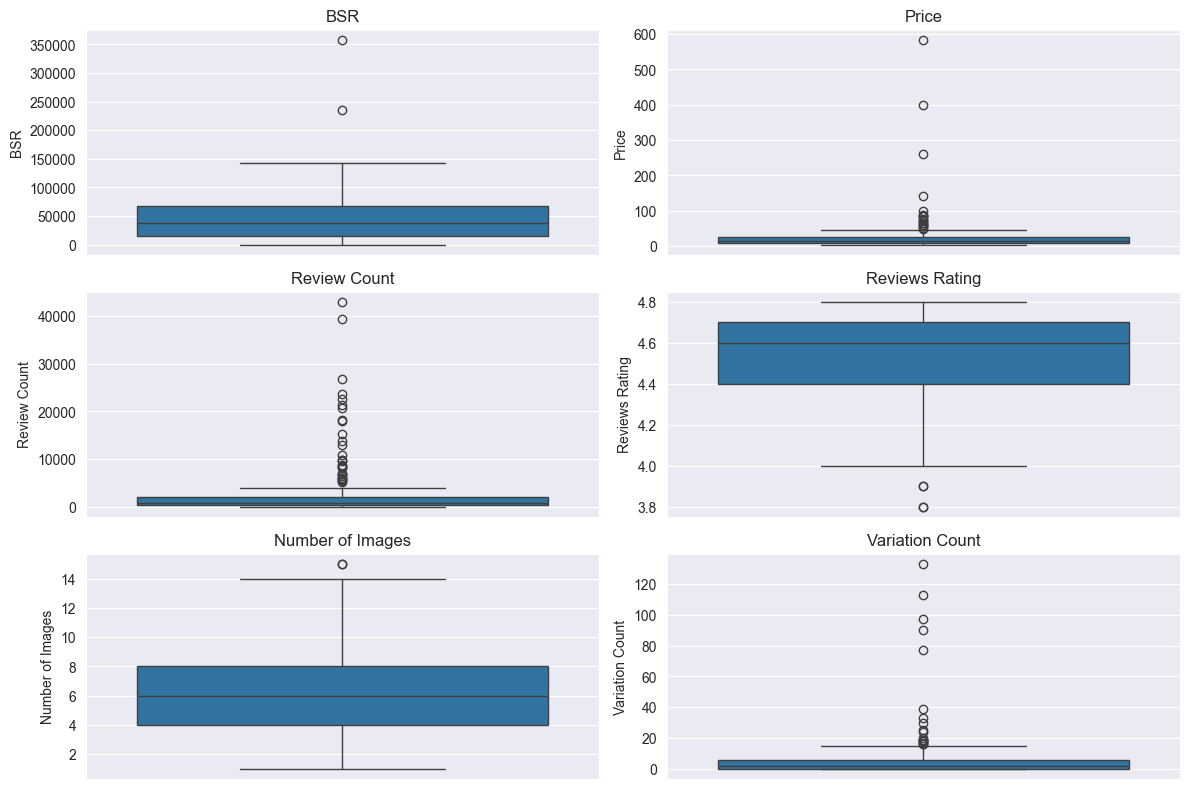

In [64]:
f = df.columns.values
f = f[:-1]

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for ax, feature in zip(axes.flatten(), f):
    sns.boxplot(data=df, y=feature, ax=ax)
    ax.set_title(f"{feature}")

plt.tight_layout()
plt.show()

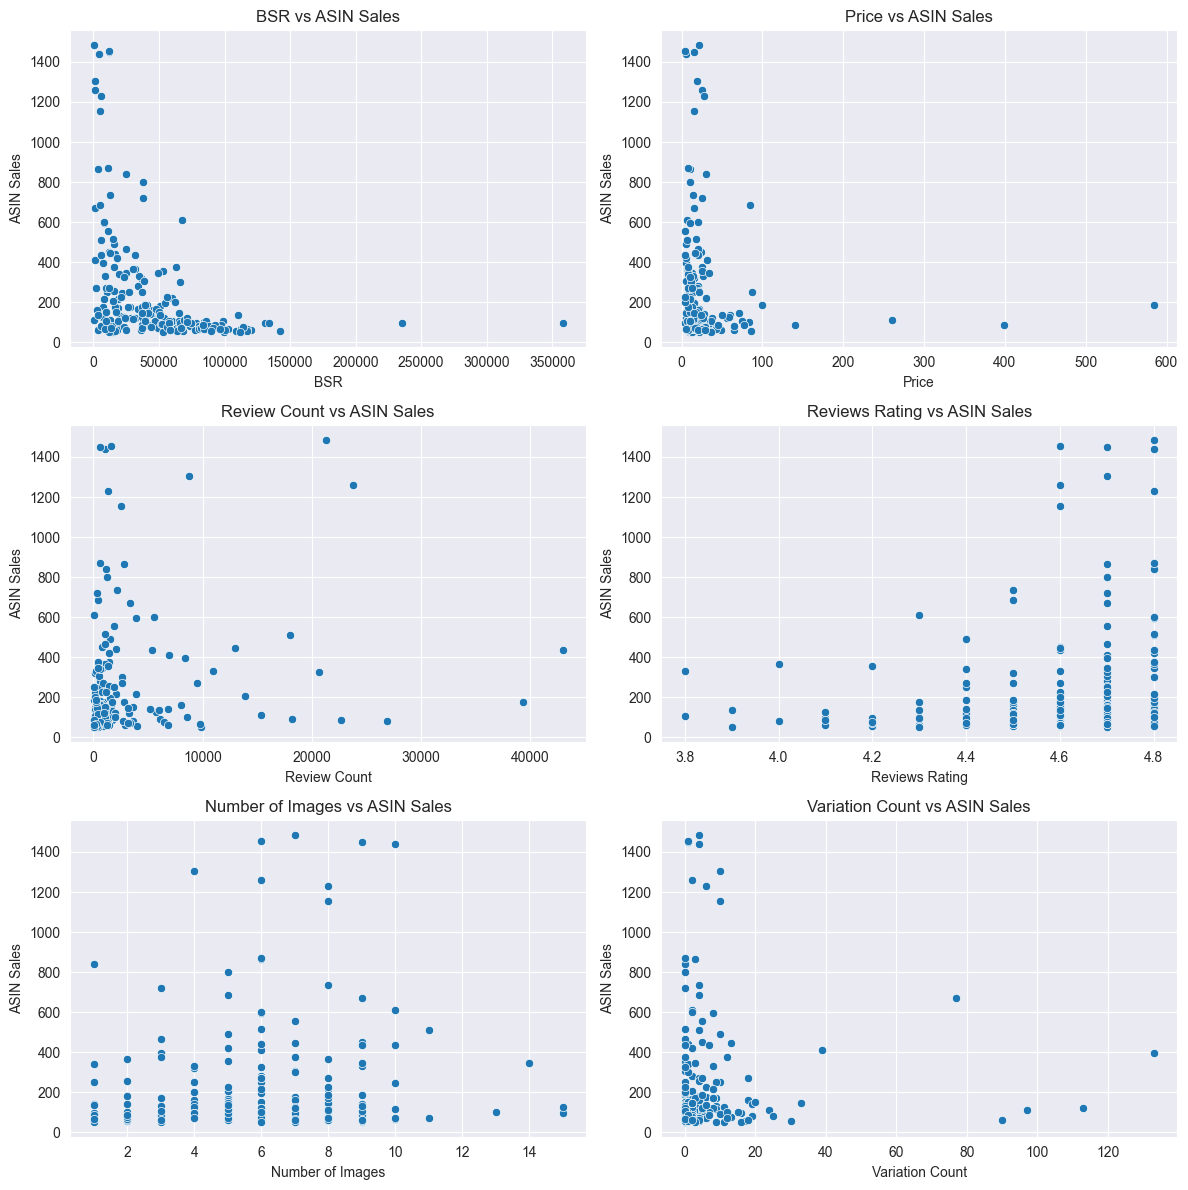

In [62]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

for ax, feature in zip(axes.flatten(), features):
    sns.scatterplot(df,x=feature,y=target, ax=ax)
    ax.set_title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

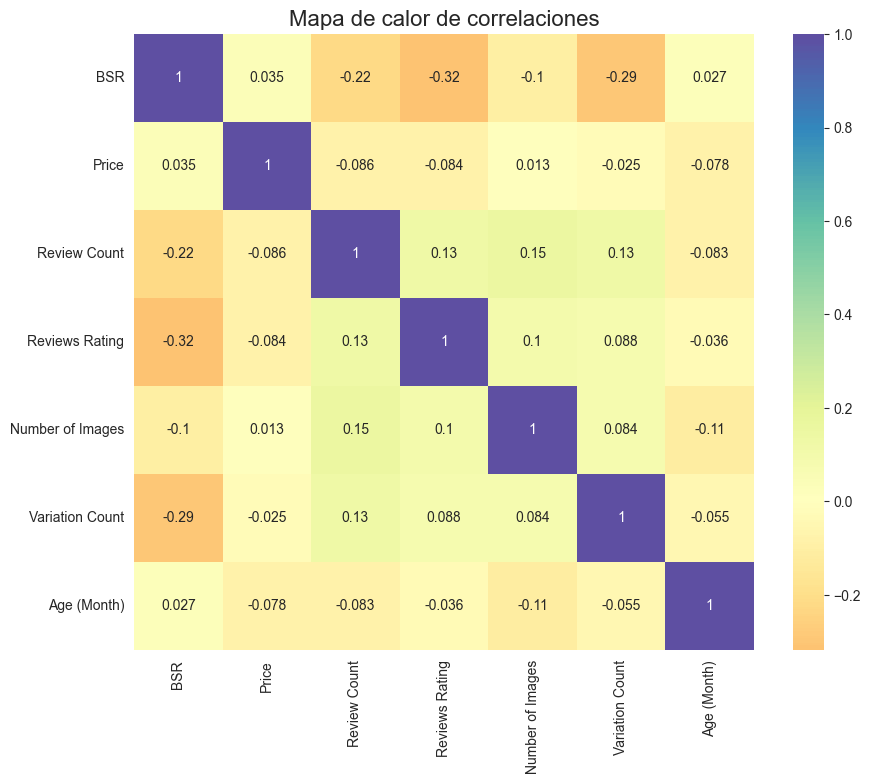

In [52]:
dfc = df.iloc[:,:-1]
corr = dfc.corr()   # calculamos la matriz de correlación

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="Spectral", center=0)
plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()

## **Modelado**
---


In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler


X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Cross-validation RMSE (k-fold)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = -cross_val_score(lr, scaler.transform(X), y, cv=cv, scoring='neg_mean_squared_error')
print("CV RMSE mean:", np.sqrt(cv_scores).mean())

MAE: 241.2454834720482
RMSE: 374.2171679245958
R2: -1.0121143951894829
CV RMSE mean: 268.0196341028041


## **Conclusiones**
---

En este proyecto se intentó predecir las **ventas de productos en Amazon** a partir de variables obtenidas con **Helium10 Blackbox**

### Features utilizadas  
- Best Sellers Rank (BSR)  
- Price  
- Review Count  
- Reviews Rating  
- Number of Images  
- Variation Count  
- Age (Month)  

### Resultados con regresión lineal múltiple  

Estos resultados muestran un ajuste deficiente del modelo (R² negativo y error elevado), lo que indica que:  
- Las variables seleccionadas no explican de forma significativa las ventas.  
- El muestreo de datos fue muy amplio (sin un filtro acotado en Blackbox), lo que pudo introducir mucho ruido.  
- La regresión lineal múltiple no captura bien la relación entre las features y la variable objetivo.  

---

### Próximos pasos  
- **Acotar la búsqueda de datos:** aplicar filtros más específicos en Blackbox (categoría concreta, rango de precios) 
- **Explorar otros modelos:** Random Forest, Gradient Boosting, u otros modelos que permitan capturar relaciones no lineales

---